# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country_dict = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    city_country = city.city_name + ' ' + city.country_code
    # If the city is unique, then add it to a our cities list
    if city.city_name  not in cities:
         country_dict.append([city.city_name, city.country_code])
         cities.append(city.city_name)
            

# Print the city count to confirm sufficient count
len(country_dict)


630

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url ="https://api.openweathermap.org/data/2.5/weather?"

weather_data_list=[]
print ("Beginning Data Retrieval ")   
print("-----------------------------")
counter=0
set=1
for count_cities in range(len(country_dict)):
    city = country_dict[count_cities][0]
    country = country_dict[count_cities][1]
    query_params= {'q': city + ',' + country,
                  'appid': api_key}



    response = requests.get(url, params = query_params).json()
    
    try:
        weather_data_list.append({'City': city,
                                  'Country': country,
                                  'Longitude': response['coord']['lon'], 
                                  'Latitude': response['coord']['lat'],
                                  'Max Temperature': response['main']['temp_max'],
                                  'Humidity': response['main']['humidity'],
                                  'Cloud Cover': response['clouds']['all'],
                                  'Wind Speed': response['wind']['speed']
                                 })
        counter+=1
        if counter > 50:
            counter=0
            set+=1
        print(f"Processing Record {counter} of Set {set} | {city}")
        
    except:
        print("City not found. Skipping...")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 of Set 1 | vallenar
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | port alfred
Processing Record 4 of Set 1 | ribera
Processing Record 5 of Set 1 | ilheus
Processing Record 6 of Set 1 | narsaq
Processing Record 7 of Set 1 | visby
City not found. Skipping...
Processing Record 8 of Set 1 | busselton
City not found. Skipping...
Processing Record 9 of Set 1 | butaritari
City not found. Skipping...
Processing Record 10 of Set 1 | kargopol
City not found. Skipping...
Processing Record 11 of Set 1 | magadi
Processing Record 12 of Set 1 | hilo
Processing Record 13 of Set 1 | witu
Processing Record 14 of Set 1 | ndele
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | bredasdorp
City not found. Skipping...
Processing Record 17 of Set 1 | lavrentiya
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | bluff
Processing Record 20 of Set 1 | gainesville
Proces

Processing Record 27 of Set 4 | qandala
Processing Record 28 of Set 4 | quang ngai
Processing Record 29 of Set 4 | sao joao da barra
Processing Record 30 of Set 4 | laviana
Processing Record 31 of Set 4 | katsuura
City not found. Skipping...
Processing Record 32 of Set 4 | richards bay
Processing Record 33 of Set 4 | tiksi
Processing Record 34 of Set 4 | segovia
Processing Record 35 of Set 4 | mulki
Processing Record 36 of Set 4 | balikpapan
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | makakilo city
Processing Record 40 of Set 4 | hervey bay
Processing Record 41 of Set 4 | manokwari
City not found. Skipping...
Processing Record 42 of Set 4 | northam
Processing Record 43 of Set 4 | polican
Processing Record 44 of Set 4 | nikolskoye
Processing Record 45 of Set 4 | tautira
City not found. Skipping...
Processing Record 46 of Set 4 | togur
Processing Record 47 of Set 4 | udachnyy
Processing Record 48 of Set 4 | victoria
Pro

City not found. Skipping...
Processing Record 8 of Set 8 | bilma
Processing Record 9 of Set 8 | rock sound
Processing Record 10 of Set 8 | sulangan
Processing Record 11 of Set 8 | vostok
Processing Record 12 of Set 8 | salalah
Processing Record 13 of Set 8 | fortuna
Processing Record 14 of Set 8 | hohoe
Processing Record 15 of Set 8 | dalvik
Processing Record 16 of Set 8 | touros
City not found. Skipping...
Processing Record 17 of Set 8 | saint-augustin
Processing Record 18 of Set 8 | coahuayana
City not found. Skipping...
Processing Record 19 of Set 8 | ruston
City not found. Skipping...
Processing Record 20 of Set 8 | bahia blanca
Processing Record 21 of Set 8 | hobyo
Processing Record 22 of Set 8 | pinar del rio
Processing Record 23 of Set 8 | mandalgovi
City not found. Skipping...
Processing Record 24 of Set 8 | zhezkazgan
Processing Record 25 of Set 8 | amurzet
Processing Record 26 of Set 8 | chokwe
Processing Record 27 of Set 8 | peniche
City not found. Skipping...
Processing Rec

Processing Record 34 of Set 11 | gisborne
Processing Record 35 of Set 11 | cavalcante
Processing Record 36 of Set 11 | shahr-e babak
City not found. Skipping...
Processing Record 37 of Set 11 | naze
Processing Record 38 of Set 11 | namatanai
Processing Record 39 of Set 11 | warrensburg
Processing Record 40 of Set 11 | shelburne
Processing Record 41 of Set 11 | astoria


In [7]:
weather_df = pd.DataFrame(weather_data_list)

weather_df.count()

City               551
Cloud Cover        551
Country            551
Humidity           551
Latitude           551
Longitude          551
Max Temperature    551
Wind Speed         551
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

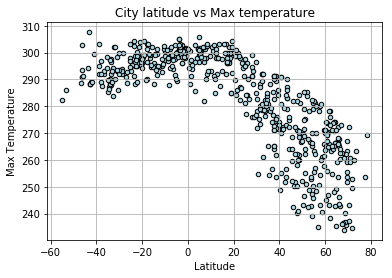

In [24]:

weather_df.head()
weather_df.plot.scatter('Latitude', 
                       'Max Temperature',
                       title='City Coordinate Distribution',
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True)
plt.title('City latitude vs Max temperature')
plt.savefig('../Images/latvstemp.png', dpi=300)

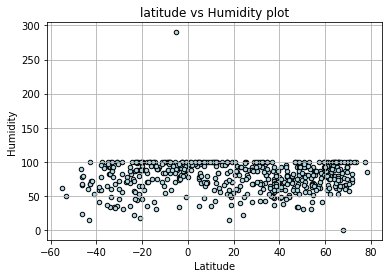

In [25]:
weather_df.plot.scatter('Latitude', 
                       'Humidity',
                       title='City Coordinate Distribution',
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True)
plt.title('latitude vs Humidity plot')
plt.savefig('../Images/Humdity.png', dpi=300)

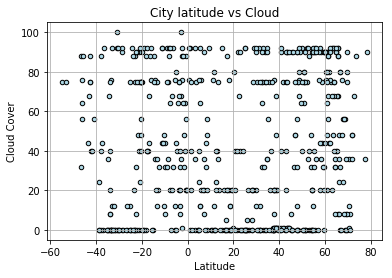

In [26]:
weather_df.plot.scatter('Latitude', 
                       'Cloud Cover',
                       title='City Coordinate Distribution',
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True)
plt.title('City latitude vs Cloud')
plt.savefig('../Images/latvsCloud.png', dpi=300)

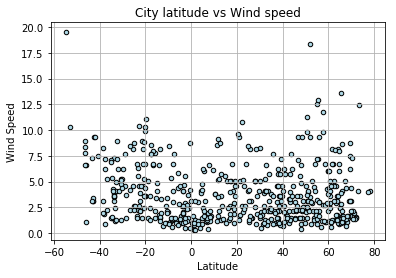

In [27]:
weather_df.plot.scatter('Latitude', 
                       'Wind Speed',
                       title='City Coordinate Distribution',
                       color='LightBlue',
                       edgecolor='Black',
                       grid=True)
plt.title('City latitude vs Wind speed')
plt.savefig('../Images/latvswind', dpi=300)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [23]:

#Export to csv
weather_df.to_csv('clean_weather_data.csv')